In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np

class SVM(object):
    def __init__(self):
        self.colors = {1:'g',-1:'r'}
        self.fig = plt.figure()
        self.ax = self.fig.add_subplot(1,1,1)
    
    def fit(self,data):
        self.data = data
        opt_dict = {}
        
        transforms = [[1,1],[-1,1],[-1,-1],[1,-1]]
        
        all_data = np.array([])
        for yi in self.data:
            all_data = np.append(all_data,self.data[yi])
                    
        self.max_feature_value = max(all_data)         
        self.min_feature_value = min(all_data)
        all_data = None
        
        step_sizes = [self.max_feature_value * 0.1,
                      self.max_feature_value * 0.01,
                      self.max_feature_value * 0.001,]
        
        b_range_multiple = 5
        b_multiple = 5
        
        latest_optimum = self.max_feature_value*10
    
        for step in step_sizes:
            w = np.array([latest_optimum,latest_optimum])
            
            optimized = False
            while not optimized:
                for b in np.arange(-1*self.max_feature_value*b_range_multiple,
                                   self.max_feature_value*b_range_multiple,
                                   step*b_multiple):
                    for transformation in transforms:
                        w_t = w*transformation
                        found_option = True
                        
                        for i in self.data:
                            for xi in self.data[i]:
                                yi=i
                                if not yi*(np.dot(w_t,xi)+b)>=1:
                                    found_option=False
                        if found_option:
                            #нашли нужные значения w_t, b
                            opt_dict[np.linalg.norm(w_t)]=[w_t,b]
                
                if w[0]<0:
                    optimized=True
                else:
                    w = w-step
                    
            norms = sorted([n for n in opt_dict])
            #наши оптимальные w, b
            opt_choice = opt_dict[norms[0]]

            self.w=opt_choice[0]
            self.b=opt_choice[1]
            
            latest_optimum = opt_choice[0][0]+step*2
    
    def predict(self,features):
        #(x.w+b)
        classification = np.sign(np.dot(np.array(features),self.w)+self.b)
        if classification!=0:
            self.ax.scatter(features[0],features[1],s=200,marker='*',c=self.colors[classification])
        return (classification)
    
    def visualize(self):
        [[self.ax.scatter(x[0],x[1],s=100,c=self.colors[i]) for x in data_dict[i]] for i in data_dict]
        
         # строим гиперплоскость(прямую)
        def hyperplane(x,w,b,v):
            return (-w[0]*x-b+v)/w[1]
       
        hyp_x_min= self.min_feature_value*0.9
        hyp_x_max = self.max_feature_value*1.1
        
        # (w.x+b)=1
        # положительный опорный вектор гиперплоскости
        pav1 = hyperplane(hyp_x_min,self.w,self.b,1)
        pav2 = hyperplane(hyp_x_max,self.w,self.b,1)
        self.ax.plot([hyp_x_min,hyp_x_max],[pav1,pav2],'k')
        
        # (w.x+b)=-1
        #отрицательный опорный вектор гиперплоскости
        nav1 = hyperplane(hyp_x_min,self.w,self.b,-1)
        nav2 = hyperplane(hyp_x_max,self.w,self.b,-1)
        self.ax.plot([hyp_x_min,hyp_x_max],[nav1,nav2],'k')
        
        # (w.x+b)=0
        db1 = hyperplane(hyp_x_min,self.w,self.b,0)
        db2 = hyperplane(hyp_x_max,self.w,self.b,0)
        self.ax.plot([hyp_x_min,hyp_x_max],[db1,db2],'y--')

In [2]:
#точки
data_dict = {-1:np.array([[0, 3], [1, 4], [0, 5]]),1:np.array([[8,10],[7, 9],[6, 9]])}

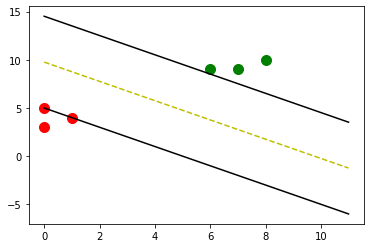

In [3]:
svm = SVM()
svm.fit(data=data_dict)
svm.visualize()

In [4]:
svm.predict([1,-1])

-1.0